In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
credit_rename = credits.rename(columns={'movie_id': 'id'}) # Rename movie_id(in Credits) to id

df = movies.merge(credit_rename, on='id') # merge movie and credit_rename dataframe 

In [7]:
#  Drop unwanted columns
df.drop(['homepage', 'title_x', 'title_y', 'production_countries', 'status'], 1, inplace=True)

# Using Weight average for Each value average Rating 

    W =  Rv + Cm
        ---------
          v + m 
    
    W = weighted rating
    R = average of rating of movie from 0 to 10(mean) = (Rating)
    v = number of votes for the movie = (Votes)
    C = the mean votes across whole report 

In [8]:
v = df['vote_count']
m = v.quantile(.7) # 70 percentile
R = df['vote_average']
C = R.mean()


In [9]:
df['weighted_average'] = ((R*v)+ (C*m))/(v+m)

In [10]:
df['weighted_average'].head()

0    7.148013
1    6.807627
2    6.276075
3    7.509565
4    6.098319
Name: weighted_average, dtype: float64

In [14]:
movie_sorted_Ranking = df.sort_values('weighted_average', ascending=False)
movie_sorted_Ranking[['original_title','vote_count','vote_average', 'weighted_average']].head(10)

,original_title,vote_count,vote_average,weighted_average
1881,The Shawshank Redemption,8205,8.5,8.340775
3337,The Godfather,5893,8.4,8.192887
662,Fight Club,9413,8.3,8.171648
3232,Pulp Fiction,8428,8.3,8.157615
65,The Dark Knight,12002,8.2,8.102674
809,Forrest Gump,7927,8.2,8.056059
1818,Schindler's List,4329,8.3,8.038748
3865,Whiplash,4254,8.3,8.034695
96,Inception,13752,8.1,8.018611
1990,The Empire Strikes Back,5879,8.2,8.010426


(2, 10)

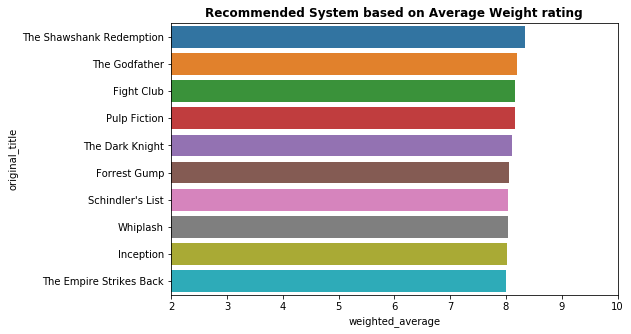

In [27]:
# plot bar graph
weighted_average = movie_sorted_Ranking.head(10)

plt.figure(figsize = (8, 5))
sns.barplot(x=weighted_average['weighted_average'], y = weighted_average['original_title'])
plt.title('Recommended System based on Average Weight rating', weight = 'bold')
plt.xlim(2, 10)


In [15]:
popularity_average = df.sort_values('popularity', ascending = False).head(10)

popularity_average[['original_title','popularity','vote_count','vote_average']]

,original_title,popularity,vote_count,vote_average
546,Minions,875.581305,4571,6.4
95,Interstellar,724.247784,10867,8.1
788,Deadpool,514.569956,10995,7.4
94,Guardians of the Galaxy,481.098624,9742,7.9
127,Mad Max: Fury Road,434.278564,9427,7.2
28,Jurassic World,418.708552,8662,6.5
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,6985,7.5
82,Dawn of the Planet of the Apes,243.791743,4410,7.3
200,The Hunger Games: Mockingjay - Part 1,206.227151,5584,6.6
88,Big Hero 6,203.734590,6135,7.8


Text(0.5, 1.0, 'Recommended System based on Average Weight rating')

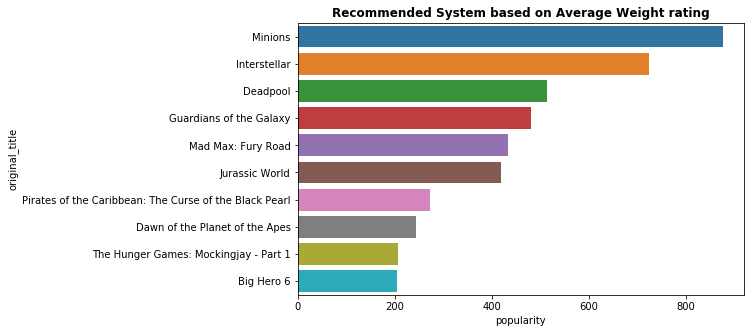

In [25]:
plt.figure(figsize = (8, 5))
sns.barplot(x=popularity_average['popularity'], y = popularity_average['original_title'])
plt.title('Recommended System based on Average Weight rating', weight = 'bold')


# Recommended Based on both weighted average and popularity (50% each)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df[['weighted_average', 'popularity']])
df_normalize = pd.DataFrame(df_scale , columns=['weighted_average', 'popularity'])
df_normalize.head(10)

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169
5,0.340926,0.132141
6,0.690093,0.055600
7,0.689761,0.153360
8,0.707820,0.112937
9,0.287188,0.177928


In [34]:
df[['normalize_weighted_average', 'normalize_popularity']] = df_normalize

In [37]:
df['score'] = df['normalize_weighted_average']*0.5+ df['normalize_popularity']*0.5
movie_score_df = df.sort_values(['score'], ascending=False)
movie_score_df[['original_title','normalize_weighted_average', 'normalize_popularity', 'score']]

,original_title,normalize_weighted_average,normalize_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
...,...,...,...,...
2122,Epic Movie,0.102239,0.006926,0.054583
210,Batman & Robin,0.019593,0.057189,0.038391
3746,The Boy Next Door,0.039279,0.027595,0.033437
242,Fantastic Four,0.017935,0.043544,0.030740


Text(0.5, 1.0, 'recommendation based on popularity and average weighting')

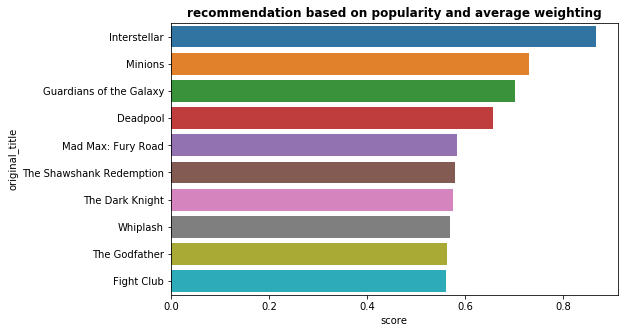

In [46]:
score_df = movie_score_df.sort_values('score', ascending= False)

plt.figure(figsize = (8, 5))
sns.barplot(x= score_df['score'].head(10),y = score_df['original_title'].head(10))
plt.title('recommendation based on popularity and average weighting', weight = 'bold')